In [1]:
import pandas as pd
import random
import re

# Load the dataset
file_path = 'hindi.csv'
data = pd.read_csv(file_path)

# Randomly select 10,000 rows from the dataset
subset_data = data.sample(n=10000, random_state=42)

# Basic Text Normalization function
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = text.replace('?', '').replace('!', '').replace('.', '').replace(',', '')
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])
    text = re.sub(r'[^\u0900-\u097F ]', '', text)  # Keep only Hindi (Devanagari) characters
    return text

# Apply normalization to the 'Sentence' column
subset_data['Sentence'] = subset_data['Sentence'].apply(normalize_text)

# Display the first 5 rows after normalization
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251  मेरा अनपढ़ तबाहकुन है और यह हमेशा मोहजाल में फ...  Negative   Anger
124137  अगर आत्मदर्शन कुम्हलाना सिद्धि है तो शरण छानना है   Neutral   Peace
62810                       सुरुचि यह दिल की कश्ती उमंगना  Positive    Love
65425                         उमंग यह प्रेम का ख़याल जीना  Positive    Love
30074   सत्यनिष्ठा यह हर्ष से हृदय में उमंगें भरना संत...  Positive     Joy


In [2]:
# Define a list of 5 custom Gujarati stopwords
marathi_stopwords = set(['और', 'का', 'है', 'के', 'की', 'से', 'को', 'पर', 'यह', 'था', 'हूँ', 'ही', 'हैं', 'इस', 'था', 'हो', 'है', 'भी', 'जो', 'तक', 'में', 'नहीं', 'तो', 'कर', 'रहा', 'थे', 'एक', 'कि', 'था', 'थे', 'सब', 'कभी', 'होता', 'बाद', 'साथ', 'लिए', 'दो', 'अब', 'तक', 'आप', 'हम', 'वे', 'उन', 'उनका', 'मुझे', 'यहाँ', 'किया', 'दिया', 'गया', 'रही', 'रहे', 'क्या', 'कौन', 'कब', 'कैसे', 'जैसे', 'जब', 'किस', 'यदि', 'यही', 'उसे', 'वह', 'थी', 'रख', 'हो', 'हूँ', 'जाता', 'जाती', 'रहेगा', 'होगा', 'जाने', 'करना', 'आदि', 'कहाँ', 'यानी', 'उसका'
])  # Add relevant Gujarati stopwords
# Function to remove stopwords
def remove_stopwords(text, stopwords):
    return ' '.join([word for word in text.split() if word not in marathi_stopwords])

# Apply stopword removal
subset_data['Sentence'] = subset_data['Sentence'].apply(lambda x: remove_stopwords(x, marathi_stopwords))

# Display the first 5 rows after stopword removal
print(subset_data.head())


                                           Sentence Sentiment Emotion
134251  मेरा अनपढ़ तबाहकुन हमेशा मोहजाल फँसाना रहता  Negative   Anger
124137     अगर आत्मदर्शन कुम्हलाना सिद्धि शरण छानना   Neutral   Peace
62810                       सुरुचि दिल कश्ती उमंगना  Positive    Love
65425                         उमंग प्रेम ख़याल जीना  Positive    Love
30074      सत्यनिष्ठा हर्ष हृदय उमंगें भरना संतुष्ट  Positive     Joy


In [3]:
# Filter sentences that are too short (less than 5 words)
subset_data = subset_data[subset_data['Sentence'].apply(lambda x: len(x.split()) >= 5)]

# Display the remaining dataset
print(subset_data.head())


                                              Sentence Sentiment Emotion
134251     मेरा अनपढ़ तबाहकुन हमेशा मोहजाल फँसाना रहता  Negative   Anger
124137        अगर आत्मदर्शन कुम्हलाना सिद्धि शरण छानना   Neutral   Peace
30074         सत्यनिष्ठा हर्ष हृदय उमंगें भरना संतुष्ट  Positive     Joy
23677   मेरा सम्मान उत्साहितमय हमेशा संतुष्ट होना रहता  Positive     Joy
134856                रुकावट आवेश रिसाव होना कष्ट देना  Negative   Anger


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the 'Sentence' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(subset_data['Sentence'])

# Encoding the labels for Sentiment and Emotion
y_sentiment = subset_data['Sentiment']
y_emotion = subset_data['Emotion']

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_sentiment_train, y_sentiment_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_sentiment, y_emotion, test_size=0.2, random_state=42)

# Display the shapes of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (6392, 1466)
Test data shape: (1598, 1466)


Sentiment Accuracy: 0.8773466833541927
Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.93      0.90       605
     Neutral       0.85      0.80      0.83       434
    Positive       0.89      0.88      0.88       559

    accuracy                           0.88      1598
   macro avg       0.88      0.87      0.87      1598
weighted avg       0.88      0.88      0.88      1598

Sentiment Confusion Matrix:
[[562  19  24]
 [ 49 349  36]
 [ 27  41 491]]


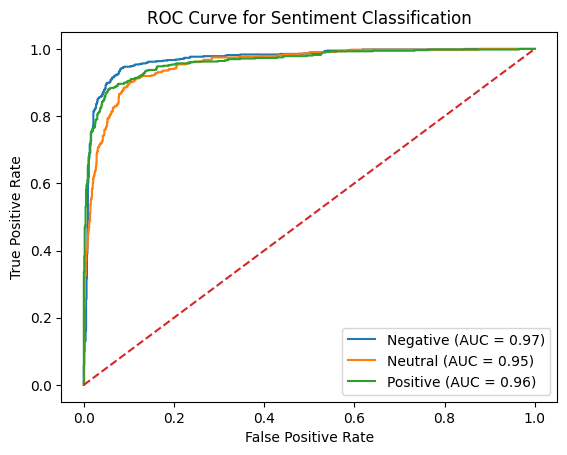

Emotion Accuracy: 0.7634543178973717
Emotion Classification Report:
              precision    recall  f1-score   support

  Acceptance       0.82      0.98      0.90       149
       Anger       0.77      0.88      0.82       187
        Calm       0.72      0.62      0.67       146
       Grief       0.65      0.66      0.65       203
        Hope       0.82      0.84      0.83       176
         Joy       0.83      0.92      0.87       206
        Love       0.76      0.72      0.74       177
       Peace       0.76      0.53      0.62       139
     Sadness       0.72      0.69      0.70       215

    accuracy                           0.76      1598
   macro avg       0.76      0.76      0.76      1598
weighted avg       0.76      0.76      0.76      1598

Emotion Confusion Matrix:
[[146   0   0   0   1   0   1   1   0]
 [  1 165   5   2   1   1   4   1   7]
 [  5  10  91   8   3   4  10   6   9]
 [  0   9   5 133   6   2   6   5  37]
 [  8   2   2   3 147  11   0   3   0]
 [  1 

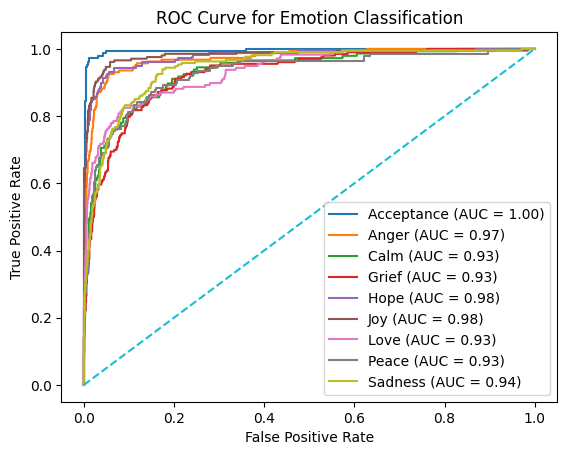

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the ROC curve for multiclass classification
def plot_multiclass_roc(y_true, y_scores, title, classes):
    # Binarize the labels for each class
    y_true_bin = label_binarize(y_true, classes=classes)

    # Plot ROC curve for each class
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        auc = roc_auc_score(y_true_bin[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Train the SVM model for Sentiment classification using OneVsRest strategy
svm_sentiment = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_sentiment.fit(X_train, y_sentiment_train)

# Evaluate the model for sentiment classification
y_sentiment_pred = svm_sentiment.predict(X_test)
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print(f"Sentiment Accuracy: {sentiment_accuracy}")

# Confusion matrix and classification report for sentiment
print("Sentiment Classification Report:")
print(classification_report(y_sentiment_test, y_sentiment_pred))

print("Sentiment Confusion Matrix:")
print(confusion_matrix(y_sentiment_test, y_sentiment_pred))

# ROC and AUC for sentiment
y_sentiment_scores = svm_sentiment.decision_function(X_test)
sentiment_classes = svm_sentiment.classes_
plot_multiclass_roc(y_sentiment_test, y_sentiment_scores, "ROC Curve for Sentiment Classification", sentiment_classes)

# Train the SVM model for Emotion classification using OneVsRest strategy
svm_emotion = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_emotion.fit(X_train, y_emotion_train)

# Evaluate the model for emotion classification
y_emotion_pred = svm_emotion.predict(X_test)
emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
print(f"Emotion Accuracy: {emotion_accuracy}")

# Confusion matrix and classification report for emotion
print("Emotion Classification Report:")
print(classification_report(y_emotion_test, y_emotion_pred))

print("Emotion Confusion Matrix:")
print(confusion_matrix(y_emotion_test, y_emotion_pred))

# ROC and AUC for emotion
y_emotion_scores = svm_emotion.decision_function(X_test)
emotion_classes = svm_emotion.classes_
plot_multiclass_roc(y_emotion_test, y_emotion_scores, "ROC Curve for Emotion Classification", emotion_classes)


In [9]:
# Custom Gujarati sentences and their English translations
custom_sentences_gujarati = ["तेरी बातें दिल को सुकून देती हैं जैसे सावन की पहली बारिश",
"दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से",
"अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा",
"जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है",
"जीवन में जब हर दिन नई मुस्कान मिलती है तो दिल खुशी से भर जाता है"
]

# English translations
custom_sentences_english = ["Your words bring peace to my heart, like the first rain of the monsoon",
"In the depths of my heart, there is a silence, like an instrument without melody",
"If you want to make your dreams come true, you have to keep making continuous efforts",
"When coexistence offers help, accepting life becomes easier",
"When every day brings a new smile in life, the heart fills with happiness"
]
# Apply the same preprocessing to custom sentences
custom_sentences_preprocessed = [normalize_text(sentence) for sentence in custom_sentences_gujarati]
custom_sentences_preprocessed = [remove_stopwords(sentence, marathi_stopwords) for sentence in custom_sentences_preprocessed]

# Vectorize the custom sentences
custom_sentences_tfidf = tfidf_vectorizer.transform(custom_sentences_preprocessed)

# Predict Sentiment and Emotion using the trained models
custom_sentiment_pred = svm_sentiment.predict(custom_sentences_tfidf)
custom_emotion_pred = svm_emotion.predict(custom_sentences_tfidf)

# Display the results with English translations
for i, sentence in enumerate(custom_sentences_gujarati):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {custom_sentences_english[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_pred[i]}")
    print(f"Predicted Emotion: {custom_emotion_pred[i]}")
    print()


Gujarati Sentence: तेरी बातें दिल को सुकून देती हैं जैसे सावन की पहली बारिश
English Translation: Your words bring peace to my heart, like the first rain of the monsoon
Predicted Sentiment: Negative
Predicted Emotion: Grief

Gujarati Sentence: दिल के कोने में कुछ टूटता हुआ सा महसूस होता है, जैसे पत्ते गिरते हैं शाखों से
English Translation: In the depths of my heart, there is a silence, like an instrument without melody
Predicted Sentiment: Negative
Predicted Emotion: Grief

Gujarati Sentence: अगर आप अपने सपनों को सच करना चाहते हैं, तो आपको लगातार प्रयास करना होगा
English Translation: If you want to make your dreams come true, you have to keep making continuous efforts
Predicted Sentiment: Positive
Predicted Emotion: Love

Gujarati Sentence: जब सह-अस्तित्व सहायता करता है, तब जीवन को अपनाना सरल हो जाता है
English Translation: When coexistence offers help, accepting life becomes easier
Predicted Sentiment: Neutral
Predicted Emotion: Acceptance

Gujarati Sentence: जीवन में जब हर दिन नई मुस

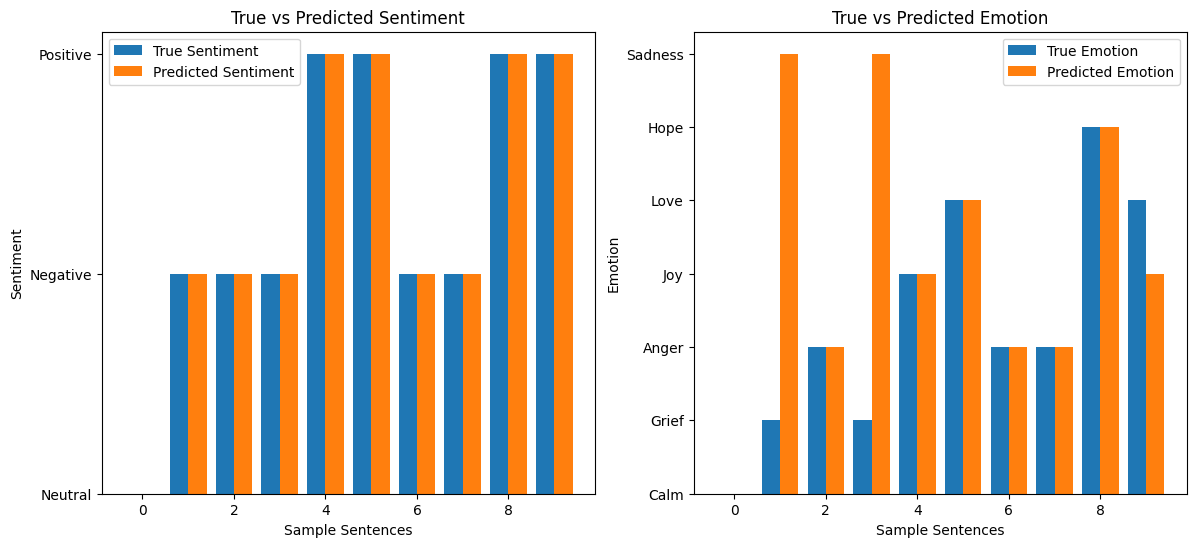

In [7]:
import numpy as np

# Take 10 random sentences from the test set
test_sample = subset_data.sample(10, random_state=42)
X_sample = tfidf_vectorizer.transform(test_sample['Sentence'])
y_sentiment_sample = test_sample['Sentiment']
y_emotion_sample = test_sample['Emotion']

# Predict sentiment and emotion for the sample
y_sentiment_pred_sample = svm_sentiment.predict(X_sample)
y_emotion_pred_sample = svm_emotion.predict(X_sample)

# Plotting the bar graph for sentiment and emotion
sentiments = np.arange(10)

plt.figure(figsize=(14, 6))

# Bar graph for Sentiment
plt.subplot(1, 2, 1)
plt.bar(sentiments - 0.2, y_sentiment_sample, 0.4, label='True Sentiment')
plt.bar(sentiments + 0.2, y_sentiment_pred_sample, 0.4, label='Predicted Sentiment')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment')
plt.legend()

# Bar graph for Emotion
plt.subplot(1, 2, 2)
plt.bar(sentiments - 0.2, y_emotion_sample, 0.4, label='True Emotion')
plt.bar(sentiments + 0.2, y_emotion_pred_sample, 0.4, label='Predicted Emotion')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion')
plt.legend()

plt.show()


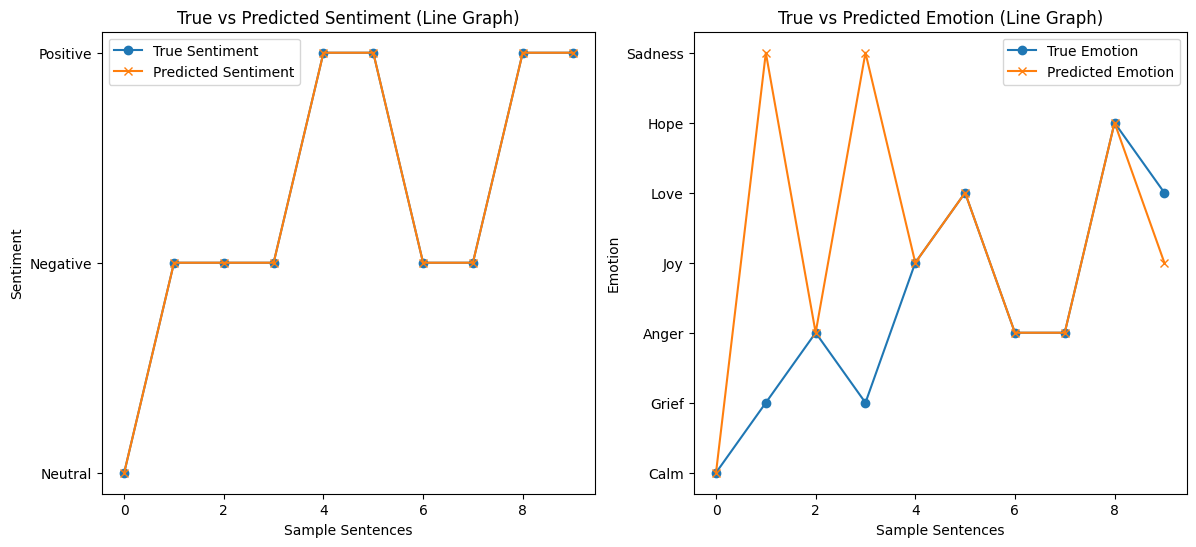

In [8]:
# Plotting the line graph for true vs predicted sentiment and emotion
plt.figure(figsize=(14, 6))

# Line graph for Sentiment
plt.subplot(1, 2, 1)
plt.plot(sentiments, y_sentiment_sample, label='True Sentiment', marker='o')
plt.plot(sentiments, y_sentiment_pred_sample, label='Predicted Sentiment', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment (Line Graph)')
plt.legend()

# Line graph for Emotion
plt.subplot(1, 2, 2)
plt.plot(sentiments, y_emotion_sample, label='True Emotion', marker='o')
plt.plot(sentiments, y_emotion_pred_sample, label='Predicted Emotion', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion (Line Graph)')
plt.legend()

plt.show()
